In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pyfibers.fibers import LeKienFiber
from pyfibers.modes.lekien import LeKienRadMode, LeKienGuidedMode
import numpy as np
from scipy.special import jv

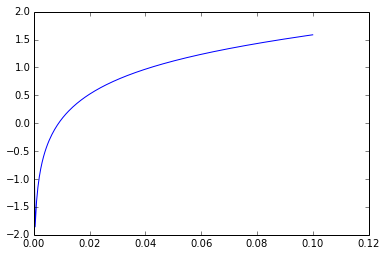

In [2]:
Rs = np.linspace(0.01,20,201)
fiber = LeKienFiber(1.45, 1.0, 1, 0.77)
m = LeKienRadMode(1, 1.45, 1.0, 0.77, 1.05, pol=1)
gm = LeKienGuidedMode(fiber, 1, 1)
Ws = np.linspace(1e-12, 0.1, 201)
eq_points = np.vectorize(gm.eigenvalue_equation, excluded=[0])(fiber, Ws)

plt.plot(Ws, eq_points)

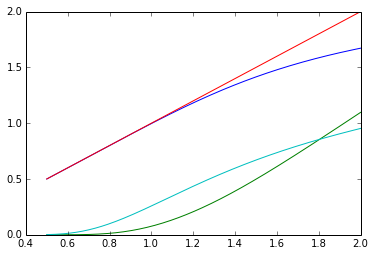

In [3]:
Us = []
Ws = []
Vs = np.linspace(0.5, 2, 201)
for V in Vs:
    fiber.V = V
    U, W = LeKienGuidedMode.getUW(fiber)
    Us.append(U)
    Ws.append(W)
    
plt.plot(Vs, Us)
plt.plot(Vs, Ws)
plt.plot(Vs, Vs)
plt.plot(Vs, 1.123*np.exp((-1+(fiber.n-fiber.nc)/(2*fiber.n))/Vs*jv(0,Vs)/jv(1,Vs)))
plt.show()

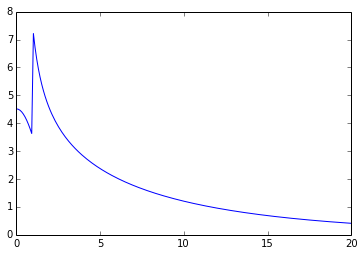

In [8]:
fiber = LeKienFiber(1.45, 1.0, 1, 1.0)
m = LeKienGuidedMode(fiber, 1, 1)

Rs = np.linspace(0.01,20, 201)
plt.plot(Rs, np.imag(m.e_r(Rs, 0, 0)))
